<a href="https://colab.research.google.com/github/notanhour/denoise/blob/main/conquest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from PIL import Image as im
from matplotlib import colors
import numpy as np
import requests

Кто тебя знает?

In [13]:
def set_color(color):
  try:
    color = [int(x) for x in (color, color, color)]
  except ValueError:
    color = [int(x * 255) for x in colors.to_rgb(color)]
  return color

"Grabby Aliens"

In [ ]:
def conquest(image, bound):
    result = np.zeros((height, width, 3), dtype=np.uint8)  # массив заполненный нулями
    for y in range(height):
        for x in range(width):
            pixel = image[y][x]
            if sum(pixel) > bound:  # если пиксель 'хороший'
                result[y][x] = pixel
                if y - 1 >= 0 and sum(image[y - 1][x]) < bound:
                    result[y - 1][x] = pixel
                if x + 1 < width and sum(image[y][x + 1]) < bound:
                    result[y][x + 1] = pixel
                if y + 1 < height and sum(image[y + 1][x]) < bound:
                    result[y + 1][x] = pixel
                if x - 1 >= 0 and sum(image[y][x - 1]).item() < bound:
                    result[y][x - 1] = pixel
    return result



---



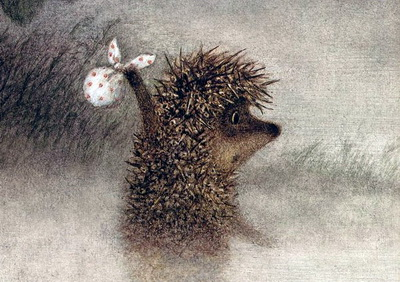

In [18]:
# image = im.open("point_test.png").convert("RGB")  # локально
url = requests.get("https://ic.pics.livejournal.com/osdru/28368153/14310/14310_original.jpg", stream=True)  # url
image = im.open(url.raw).convert("RGB")  # ...
width, height = image.size
array = np.array(image)  # изображение в массив (r, g, b)
image  # image.show()

Какого он цвета?

In [ ]:
color = set_color(input("Цвет шума: "))

Его нет? Добавим!

Количество шума: 80
Цвет шума: 0
Шум там, где (r + g + b) < 400


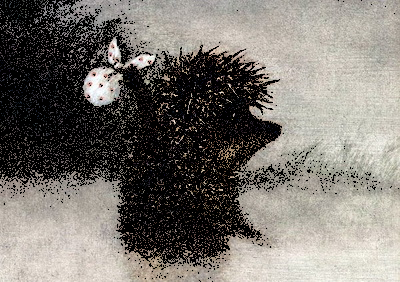

In [19]:
level = int(input("Количество шума: "))  # [1, 100]
color = set_color(input("Цвет шума: "))
maxi = int(input("Шум там, где (r + g + b) < "))
noise = np.random.random(array.shape[:2]) < (level / 100)
rgb = np.sum(image, 2)  # сумма (r, g, b)
array[noise & (rgb < maxi)] = color
im.fromarray(array)

Зачем шум?..

In [20]:
stop = 0.1  # чем меньше, тем лучше
bound = sum(color) / 3 + 10  # шум ниже этого значения
array = np.array(image)  # изображение в массив (r, g, b)
result = conquest(array, bound)
difference = np.mean(abs(result - array))
while difference > stop:
    array = result
    result = conquest(array, bound)
    difference = np.mean(abs(result - array))

Туда его!

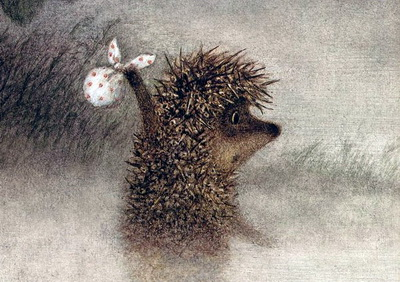

In [21]:
im.fromarray(array)  # массив в изображение